In [120]:
import pandas as pd
import os

In [121]:
lfc = pd.read_csv('../data/standardized_data/result_logfc_matrix_2019_12_10.csv')

In [122]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [123]:
lfc=lfc.dropna(axis=0)
lfc=lfc.T.reset_index()
lfc.columns=list(lfc.iloc[0,:])
lfc=lfc.iloc[1:,:]
lfc=lfc.rename(columns={'Rv_ID': 'Dataset'})
lfc=lfc.set_index('Dataset')

In [124]:
lfc.head()

,Rv0001,Rv0002,Rv0003,Rv0004,Rv0005,Rv0006,Rv0007,Rv0008c,Rv0009,Rv0010c,...,Rv3915,Rv3916c,Rv3917c,Rv3918c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c
Dataset,,,,,,,,,,,,,,,,,,,,,
PE35_KO_vs_mbio_H37Rv,-0.41,3.28,-0.03,-3.81,-0.22,0.53,-0.44,-0.22,-0.13,-0.06,...,0.26,0.55,-0.79,-0.01,0.01,0.06,1.98,-0.88,-0.32,0
PPE68_KO_vs_mbio_H37Rv,0.01,2.38,-0.08,-3.39,0.14,0.37,-0.14,-0,-0.12,0.07,...,0.69,1.11,-0.04,0.16,0.29,0,1.92,-0.37,0.1,0
Rv0950c_KO_vs_CB_WT,0,0,0.03,-2.6,0.13,-1.21,-0.47,0.43,-0.1,0.29,...,0.18,-0.15,-0.98,0.17,0.63,0.26,0.25,-0.12,-1.75,0
Rv0954_KO_vs_RJ_WT,0,0,-1.2,-6.83,-0.08,1.66,-1.21,-0.51,0.78,0.31,...,-0.12,3.06,3.94,-3.28,-1.56,-1.73,0.16,-0.82,3.01,0
Rv1096_KO_vs_CB_WT,0,0,0.39,1.54,0.27,0.25,-0.34,0.58,0.11,0.26,...,0,-0.27,-0.32,-0.21,0.52,-0.05,0.87,0.47,0.28,0


In [125]:
value_cols=[col for col in lfc.columns if col!='Dataset']

In [126]:
from sklearn.decomposition import PCA
from plotnine import *

In [127]:
pca=PCA(3)
pca_results=pca.fit_transform(lfc[value_cols])
# print(pca_results)
explained_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
pca_df=pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])
pca_df=pca_df.set_index(lfc.index)

[0.15167761 0.09300748 0.07377616]


In [128]:
lfc=lfc.merge(pca_df, left_index=True, right_index=True)

In [129]:
lfc

,Rv0001,Rv0002,Rv0003,Rv0004,Rv0005,Rv0006,Rv0007,Rv0008c,Rv0009,Rv0010c,...,Rv3918c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c,pca1,pca2,pca3
Dataset,,,,,,,,,,,,,,,,,,,,,
PE35_KO_vs_mbio_H37Rv,-0.41,3.28,-0.03,-3.81,-0.22,0.53,-0.44,-0.22,-0.13,-0.06,...,-0.01,0.01,0.06,1.98,-0.88,-0.32,0,-6.174642,8.982247,-1.841438
PPE68_KO_vs_mbio_H37Rv,0.01,2.38,-0.08,-3.39,0.14,0.37,-0.14,-0,-0.12,0.07,...,0.16,0.29,0,1.92,-0.37,0.1,0,-5.640441,7.967182,-1.855503
Rv0950c_KO_vs_CB_WT,0,0,0.03,-2.6,0.13,-1.21,-0.47,0.43,-0.1,0.29,...,0.17,0.63,0.26,0.25,-0.12,-1.75,0,-9.610594,-7.911884,-3.579600
Rv0954_KO_vs_RJ_WT,0,0,-1.2,-6.83,-0.08,1.66,-1.21,-0.51,0.78,0.31,...,-3.28,-1.56,-1.73,0.16,-0.82,3.01,0,-13.267393,-6.479317,-1.212820
Rv1096_KO_vs_CB_WT,0,0,0.39,1.54,0.27,0.25,-0.34,0.58,0.11,0.26,...,-0.21,0.52,-0.05,0.87,0.47,0.28,0,-8.972635,-6.665931,-5.916322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,0,0,0.41,0,2.2,-2.05,0,0.15,-0.24,-0.16,...,-1.36,0.73,1.7,0,-0.76,0,0,-5.622612,-9.968939,-13.553073
zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,0,0,1.3,0,-4.05,-2.93,-0.9,-0.26,0.26,0.09,...,2.73,0.54,2.99,0,1.65,0,0,-9.450235,-1.841751,-38.077028
zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,0,0,-0.49,0.7,0.3,0.87,3.05,0.44,1.99,1.58,...,0.32,-1.56,0.75,0,-0.93,1.6,0,-0.087271,-4.593651,-18.640052


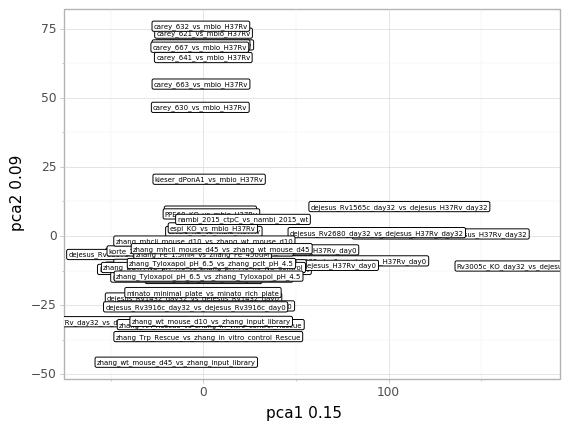

<ggplot: (-9223371893297873222)>

In [130]:
(ggplot(lfc, aes(x='pca1', y='pca2')) 
 + geom_point() 
 + theme_light() 
 + geom_label(label=lfc.index, size=5, nudge_x=10)
 + xlab(f'pca1 {np.round(explained_var[0], 2)}') 
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
)

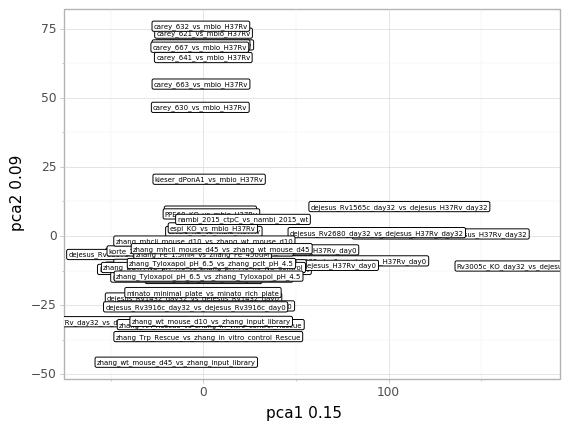

<ggplot: (143556719459)>

In [131]:
(ggplot(lfc, aes(x='pca1', y='pca2')) 
 + geom_point() 
 + theme_light() 
 + geom_label(label=lfc.index, size=5, nudge_x=10)
 + xlab(f'pca1 {np.round(explained_var[0], 2)}') 
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
)

In [132]:
from sklearn.manifold import TSNE

In [133]:
tsne = TSNE(n_components=2).fit_transform(lfc[value_cols])

In [134]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
tsne.index=lfc.index

In [135]:
lfc=lfc.merge(tsne, left_index=True, right_index=True)

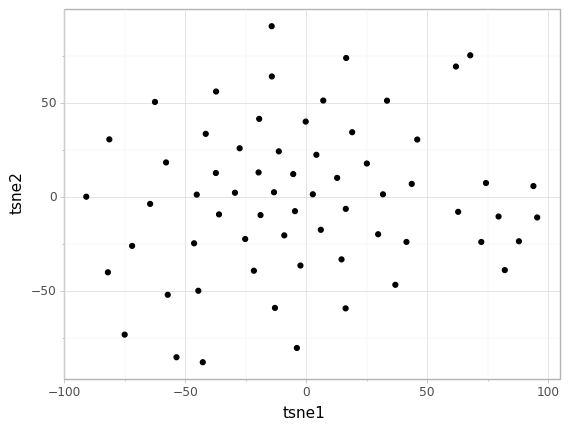

<ggplot: (143556436607)>

In [136]:
(ggplot(lfc, aes(x='tsne1', y='tsne2'))+geom_point()+theme_light())

In [139]:
del lfc.index.name

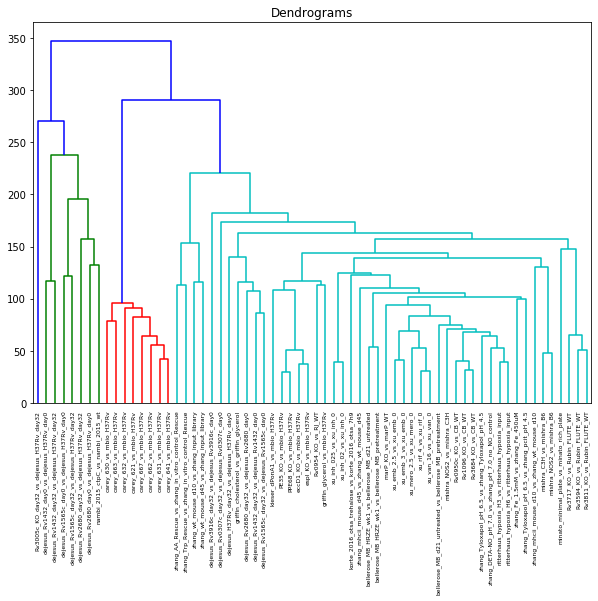

In [145]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(lfc[value_cols], method='ward'), labels=lfc.index)

In [146]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(lfc[value_cols])

In [147]:
lfc['y_hc']=y_hc

In [148]:
lfc

,Rv0001,Rv0002,Rv0003,Rv0004,Rv0005,Rv0006,Rv0007,Rv0008c,Rv0009,Rv0010c,...,Rv3921c,Rv3922c,Rv3923c,Rv3924c,pca1,pca2,pca3,tsne1,tsne2,y_hc
PE35_KO_vs_mbio_H37Rv,-0.41,3.28,-0.03,-3.81,-0.22,0.53,-0.44,-0.22,-0.13,-0.06,...,1.98,-0.88,-0.32,0,-6.174642,8.982247,-1.841438,-36.055893,-9.246114,1
PPE68_KO_vs_mbio_H37Rv,0.01,2.38,-0.08,-3.39,0.14,0.37,-0.14,-0,-0.12,0.07,...,1.92,-0.37,0.1,0,-5.640441,7.967182,-1.855503,-37.353912,12.809250,1
Rv0950c_KO_vs_CB_WT,0,0,0.03,-2.6,0.13,-1.21,-0.47,0.43,-0.1,0.29,...,0.25,-0.12,-1.75,0,-9.610594,-7.911884,-3.579600,-11.335737,24.338398,1
Rv0954_KO_vs_RJ_WT,0,0,-1.2,-6.83,-0.08,1.66,-1.21,-0.51,0.78,0.31,...,0.16,-0.82,3.01,0,-13.267393,-6.479317,-1.212820,-37.269596,56.207245,1
Rv1096_KO_vs_CB_WT,0,0,0.39,1.54,0.27,0.25,-0.34,0.58,0.11,0.26,...,0.87,0.47,0.28,0,-8.972635,-6.665931,-5.916322,-5.379040,12.221098,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,0,0,0.41,0,2.2,-2.05,0,0.15,-0.24,-0.16,...,0,-0.76,0,0,-5.622612,-9.968939,-13.553073,-41.539280,33.660294,1
zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,0,0,1.3,0,-4.05,-2.93,-0.9,-0.26,0.26,0.09,...,0,1.65,0,0,-9.450235,-1.841751,-38.077028,-14.231111,64.233940,1
zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,0,0,-0.49,0.7,0.3,0.87,3.05,0.44,1.99,1.58,...,0,-0.93,1.6,0,-0.087271,-4.593651,-18.640052,-46.351147,-24.637930,1
zhang_wt_mouse_d10_vs_zhang_input_library,0,0,-1.26,-2.62,0.69,3.7,-2.77,2.11,-1.39,1.45,...,0,-2.15,-3.8,0,-5.769468,-30.891222,50.367115,-12.935436,-59.059452,1
